<a href="https://colab.research.google.com/github/tomersk/learn-python/blob/main/10_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 10 Advance statistics
##10.1 copula
Copulas are used to describe the dependence between random variables. Copula means coupling two CDFs. Let us generate two random variables; one having normal distribution, another combination of first one and uniform distribution.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter

# synthetic data
n = 1000
x = np.random.randn(n)
y = x*0.5 + np.random.rand(n)

First we would like to how is our data related by using scatter plot, and also we would like to see how is the distribution of x and y. We can do this in three separate plots, or using subplots. In the present case we will trying this in one plot by specifying different axis for these 3 plots. We begin with defining the axis limits for our three plots. The input to axis are x and y for the lower left corner, width and height of the plot. In the following example we are specifying axis in such as way so that plots are aligned properly.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  del sys.path[0]


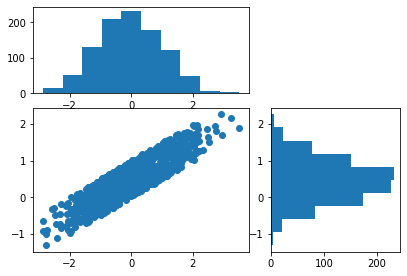

In [18]:
axScatter = plt.axes([0.1, 0.1, 0.5, 0.5])
axHistx = plt.axes([0.1, 0.65, 0.5, 0.3])
axHisty = plt.axes([0.65, 0.1, 0.3, 0.5])

#Now, we use this axis to make plots.
axScatter.scatter(x, y)
axHistx.hist(x)
axHisty.hist(y, orientation='horizontal')
# set the limit of histogram plots
axHistx.set_xlim(axScatter.get_xlim())
axHisty.set_ylim( axScatter.get_ylim())

plt.tight_layout()
plt.show()

Now, let us try to simulate ensemble of data using copula. I have written a library, *copulalib* to deal with copulas. This library has three copulas (Frank, Clayton, and Gumbel) in it. First install the library using *pip*, then we import the library and initialize the class.

In [19]:
import pip

try:
  __import__('copulalib')
except ImportError:
  pip.main(['install', 'copulalib'])  

from copulalib.copulalib import Copula 

foo = Copula(x, y, 'frank')

We can get the value of Kendall’s tau, and the parameter of Frank copula by attributes tau and theta respectively.

In [20]:
print(foo.tau)
print(foo.theta)

0.6592952952952954
9.76300048828125


We can generate the ensemble using Frank copula.

In [21]:
x1,y1 = foo.generate_xy()

Now, we can plot the simulated data with original data.

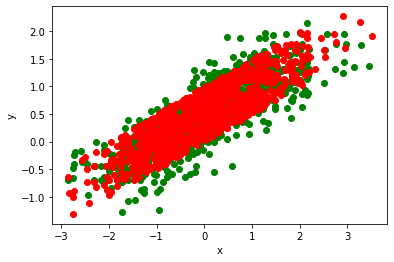

In [22]:
plt.scatter(x1,y1, color='g')
plt.scatter(x,y, color='r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()